# Introduction: IPython Widgets

In this notebook, we will get an introduction to IPython widgets. These are tools that allow us to build interactivity into our notebooks often with a single line of code. These widgets are very useful for data exploration and analysis, for example, selecting certain data or updating charts. In effect, Widgets allow you to make Jupyter Notebooks into an interactive dashboard instead of a static document.

Run the below cell if needed. You can also do this from the command line. If in Jupyter lab, [check out the instructions for that environment](https://ipywidgets.readthedocs.io/en/stable/user_install.html). 

In [1]:
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


These are the other imports will use. 

In [1]:
# Standard Data Science Helpers
import numpy as np
import pandas as pd
import scipy

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import os
from IPython.display import Image, display, HTML

## Data

For this project, we'll work with my medium stats data. You can grab your own data or just use mine! 

In [3]:
df = pd.read_parquet("https://github.com/Archana-blog/notebooks/blob/6963e561905bf15daa3a87f1ecae87cda8481699/data?raw=true", engine='pyarrow')
df.head()

,claps,days_since_publication,fans,link,num_responses,publication,published_date,read_ratio,read_time,reads,started_date,tags,text,title,title_word_count,type,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python
129,2,597.301123,2,https://medium.com/p/screw-the-environment-but...,0,None,2017-06-10 14:25:00,42.17,7,70,2017-06-10 14:24:00,"[Climate Change, Economics]","Screw the Environment, but Consider Your Walle...","Screw the Environment, but Consider Your Wallet",8,published,166,1859,0.001076,0,0,0,0,0,0
125,18,589.983168,3,https://medium.com/p/the-vanquishing-of-war-pl...,0,None,2017-06-17 22:02:00,30.34,14,54,2017-06-17 22:02:00,"[Climate Change, Humanity, Optimism, History]","The Vanquishing of War, Plague and Famine Part...","The Vanquishing of War, Plague and Famine",8,published,178,3891,0.004626,0,0,0,0,0,0
132,51,577.363292,20,https://medium.com/p/capstone-project-mercedes...,0,None,2017-06-30 12:55:00,20.02,42,222,2017-06-30 12:00:00,"[Machine Learning, Python, Udacity, Kaggle]",Capstone Project: Mercedes-Benz Greener Manufa...,Capstone Project: Mercedes-Benz Greener Manufa...,7,published,1109,12025,0.004241,0,0,0,0,1,1
126,0,576.520688,0,https://medium.com/p/home-of-the-scared-5af0fe...,0,None,2017-07-01 09:08:00,35.85,9,19,2017-06-30 18:21:00,"[Politics, Books, News, Media Criticism]",Home of the Scared A review of A Culture of Fe...,Home of the Scared,4,published,53,2533,0.000000,0,0,0,0,0,0
121,0,572.533035,0,https://medium.com/p/the-triumph-of-peace-f485...,0,None,2017-07-05 08:51:00,8.47,14,5,2017-07-03 20:18:00,"[Books, Psychology, History, Humanism]",The Triumph of Peace A review of The Better An...,The Triumph of Peace,4,published,59,3892,0.000000,1,0,0,0,0,0


In [4]:
df.describe()

,claps,days_since_publication,fans,num_responses,read_ratio,read_time,reads,title_word_count,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,1815.263158,248.407273,352.052632,7.045113,29.074662,12.917293,6336.300752,7.127820,23404.030075,3029.120301,0.957638,20.330827,0.729323,0.609023,0.436090,0.383459,0.315789
std,2449.074661,179.370879,479.060117,9.056108,12.417670,9.510795,9007.284726,3.158475,33995.636496,2393.414456,1.846756,74.111579,0.445989,0.489814,0.497774,0.488067,0.466587
min,0.000000,1.218629,0.000000,0.000000,8.110000,1.000000,1.000000,2.000000,3.000000,163.000000,0.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,74.543822,23.000000,0.000000,20.020000,8.000000,363.000000,5.000000,1375.000000,1653.000000,0.052115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,815.000000,245.416130,136.000000,4.000000,27.060000,10.000000,2049.000000,7.000000,7608.000000,2456.000000,0.421525,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2700.000000,376.080598,528.000000,12.000000,34.910000,14.000000,7815.000000,8.000000,30141.000000,3553.000000,1.099366,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,13600.000000,597.301123,2588.000000,59.000000,74.370000,54.000000,41978.000000,16.000000,173714.000000,15063.000000,17.891817,349.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Simple Widgets

Let's get started using some widgets! We'll start off pretty simple just to see how the interface works.

In [5]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

To make a function interactive, all we have to do is use the `interact` decorator. This will automatically infer the input types for us! 

In [6]:
@interact
def show_articles_more_than(column='claps', x=5000):
    display(HTML(f'<h2>Showing articles with more than {x} {column}<h2>'))
    display(df.loc[df[column] > x, ['title', 'published_date', 'read_time', 'tags', 'views', 'reads']])

interactive(children=(Text(value='claps', description='column'), IntSlider(value=5000, description='x', max=15…

In [9]:
@interact
def show_articles_more_than(column='claps', x=2000):
    display(HTML(f'<h2>Showing articles with more than {x} {column}<h2>'))
    display(df.loc[df[column] > 2000, ['claps','title', 'published_date', 'read_time', 'tags', 'views', 'reads']])

interactive(children=(Text(value='claps', description='column'), IntSlider(value=2000, description='x', max=60…

The `interact` decorator automatically inferred we want a `text` box for the `column` and an `int` slider for `x`! This makes it incredibly simple to add interactivity. We can also set the options how we want.

In [17]:
@interact
def show_titles_more_than(x=(1000, 5000, 100),
                          column=list(df.select_dtypes('number').columns), 
                          ):
    # display(HTML(f'<h2>Showing articles with more than {x} {column}<h2>'))
    display(df.loc[df[column] > x, ['title', 'published_date', 'read_time', 'tags', 'views', 'reads']])

interactive(children=(IntSlider(value=3000, description='x', max=5000, min=1000, step=100), Dropdown(descripti…

This now gives us a `dropdown` for the `column` selection and still an `int` slider for `x`, but with limits. This can be useful when we need to enforce certains constraints on the interaction.

Matplotlib is building the font cache; this may take a moment.


<Figure size 432x288 with 0 Axes>

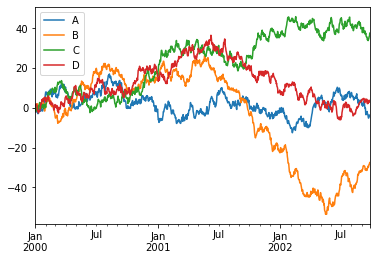

In [6]:
import matplotlib.pyplot as plt

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

df = df.cumsum()
plt.figure();
df.plot();

# Dataframe Explorer

Let's look at a few more examples of using widgets to explore data. Here we create a widget that quickly lets us find correlations between columns.

In [19]:
@interact
def correlations(column1=list(df.select_dtypes('number').columns), 
                 column2=list(df.select_dtypes('number').columns)):
    print(f"Correlation: {df[column1].corr(df[column2])}")

interactive(children=(Dropdown(description='column1', options=('claps', 'days_since_publication', 'fans', 'num…

Here's one to describe a specific column.

In [20]:
@interact
def describe(column=list(df.columns)):
    print(df[column].describe())

interactive(children=(Dropdown(description='column', options=('claps', 'days_since_publication', 'fans', 'link…

# Interactive Widgets for Plots

We can use the same basic approach to create interactive widgets for plots. This expands the capabilities of the already powerful plotly visualization library.

In [21]:
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:]):
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')

interactive(children=(Dropdown(description='x', options=('claps', 'days_since_publication', 'fans', 'num_respo…

Let's add some options to control the column scheme.

In [22]:
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 
             text='title',
             title=f'{y.title()} vs {x.title()}',
            theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('claps', 'days_since_publication', 'fans', 'num_respo…

The next plot lets us choose the grouping category for the plot. 

In [23]:
df['binned_read_time'] = pd.cut(df['read_time'], bins=range(0, 56, 5))
df['binned_read_time'] = df['binned_read_time'].astype(str)

df['binned_word_count'] = pd.cut(df['word_count'], bins=range(0, 100001, 1000))
df['binned_word_count'] = df['binned_word_count'].astype(str)

@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 categories=['binned_read_time', 'binned_word_count', 'publication', 'type'],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             categories=categories, 
             xTitle=x.title(), yTitle=y.title(), 
             text='title',
             title=f'{y.title()} vs {x.title()}',
             theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('claps', 'days_since_publication', 'fans', 'num_respo…

You may have noticed this plot was a little slow to update. When that is the case, we can use `interact_manual` which only updates the function when the button is pressed.

In [24]:
from ipywidgets import interact_manual

In [25]:
@interact_manual
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 categories=['binned_read_time', 'binned_word_count', 'publication', 'type'],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             categories=categories, 
             xTitle=x.title(), yTitle=y.title(), 
             text='title',
             title=f'{y.title()} vs {x.title()}',
             theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('claps', 'days_since_publication', 'fans', 'num_respo…

# Making Our Own Widgets

The decorator `interact` (or `interact_manual`) is not the only way to use widgets. We can also explicity create our own. One of the most useful I've found is the `DataPicker`.

In [26]:
df.set_index('published_date', inplace=True)

In [27]:
def print_articles_published(start_date, end_date):
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    stat_df = df.loc[(df.index >= start_date) & (df.index <= end_date)].copy()
    total_words = stat_df['word_count'].sum()
    total_read_time = stat_df['read_time'].sum()
    num_articles = len(stat_df)
    print(f'You published {num_articles} articles between {start_date.date()} and {end_date.date()}.')
    print(f'These articles totalled {total_words:,} words and {total_read_time/60:.2f} hours to read.')
    
_ = interact(print_articles_published,
             start_date=widgets.DatePicker(value=pd.to_datetime('2018-01-01')),
             end_date=widgets.DatePicker(value=pd.to_datetime('2019-01-01')))

interactive(children=(DatePicker(value=Timestamp('2018-01-01 00:00:00'), description='start_date'), DatePicker…

C:\Users\Archana\Anaconda3\Anaconda3_\lib\site-packages\traitlets\traitlets.py:586: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



For this function, we use a `Dropdown` and a `DatePicker` to plot one column cumulatively up to a certain time. Instead of having to write this ourselves, we can just let `ipywidgets` do all the work!

In [28]:
def plot_up_to(column, date):
    date = pd.Timestamp(date)
    plot_df = df.loc[df.index <= date].copy()
    plot_df[column].cumsum().iplot(mode='markers+lines', 
                                   xTitle='published date',
                                   yTitle=column, 
                                  title=f'Cumulative {column.title()} Until {date.date()}')
    
_ = interact(plot_up_to, column=widgets.Dropdown(options=list(df.select_dtypes('number').columns)), 
             date = widgets.DatePicker(value=pd.to_datetime('2019-01-01')))

interactive(children=(Dropdown(description='column', options=('claps', 'days_since_publication', 'fans', 'num_…

# Linked Values

We can link the value of two widgets to each other using the `jslink` function. This ties the values to be the same.

In [30]:
def show_less_than(column1_value, column2_value):
    display(df.loc[(df['views'] < column1_value) & 
                    (df['reads'] < column2_value), 
                   ['title', 'read_time', 'tags', 'views', 'reads']])
        
column1_value=widgets.IntText(value=100, label='First')
column2_value=widgets.IntSlider(value=100, label='Second')

linked = widgets.jslink((column1_value, 'value'),
                        (column2_value, 'value'))

less_than = interact(show_less_than, column1_value=column1_value,
                 column2_value=column2_value)

interactive(children=(IntText(value=100, description='column1_value'), IntSlider(value=100, description='colum…

I'm not exactly sure why you would want to link two widgets, but there you go! We can unlink them using the `unlink` command (sometimes syntax does make sense).

In [31]:
linked.unlink()

In [32]:
less_than.widget

interactive(children=(IntText(value=100, description='column1_value'), IntSlider(value=100, description='colum…

# Conclusions

These widgets are not going to change your life, but they do make notebooks closer to interactive dashboards. I've only shown you some of the capabilities so be sure to look at the [documentation for the full details]. The Jupyter Notebook is useful by itself, but with additional tools, it can be an even better data exploration and analysis technology. Thanks to the efforts of many developers and contributors to open-source, we have these great technologies, so we might as well get the most from these libraries! 

In [33]:
cscales = ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

In [34]:
import plotly.figure_factory as ff

corrs = df.corr()

@interact_manual
def plot_corrs(colorscale=cscales):
    figure = ff.create_annotated_heatmap(z = corrs.round(2).values, 
                                     x =list(corrs.columns), 
                                     y=list(corrs.index), 
                                     colorscale=colorscale,
                                     annotation_text=corrs.round(2).values)
    iplot(figure)

interactive(children=(Dropdown(description='colorscale', options=('Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Blue…

In [35]:
@interact
def plot_spread(column1=['claps', 'views', 'read', 'word_count'], 
                 column2=['views', 'claps', 'read', 'word_count']):
    df.iplot(kind='ratio',
                                                   y=column1,
                                                   secondary_y=column2,
                                                   title=f'{column1.title()} and {column2.title()} Spread Plot',
                                 xTitle='Published Date')

interactive(children=(Dropdown(description='column1', options=('claps', 'views', 'read', 'word_count'), value=…